## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

## Helper Functions

In [2]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.rcParams['font.size'] = 18
    
    #display(HTML('<style>.container {width:100% !important;}</style'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Load Datasets

In [42]:
df_houses = pd.read_csv('../data/df_houses_full_cleanned.csv')
df_venues = pd.read_csv('../data/nearby_venues_full_cleanned.csv')

# 1.0 Exploratory Data Analyse - EDA

## 1.1 df_houses

In [43]:
print(f'The dataset "df_houses" has {df_houses.shape[0]} rows and {df_houses.shape[1]} columns.')

The dataset "df_houses" has 1668 rows and 11 columns.


In [44]:
df_houses.drop_duplicates(inplace = True)

In [45]:
df_houses.head()

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
0,1719697,2021-05-13 12:16:03,Berlin,Nürnberger Straße,22.0,Pets not allowed,850,1700,38.636364,52.50027,13.33596
1,1716752,2021-05-13 12:16:05,Berlin,Schnellerstraße,90.0,Pets not allowed,450,900,5.000000,52.45495,13.51636
2,1716755,2021-05-13 12:16:07,Berlin,Schnellerstraße,90.0,Pets not allowed,475,950,5.277778,52.45495,13.51636
3,1724139,2021-05-13 12:16:09,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863
4,1721869,2021-05-13 12:16:11,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863


In [46]:
df_houses.dtypes

house_id             int64
scrapy_datetime     object
city                object
street              object
size               float64
pets                object
montly_rent          int64
deposit_value        int64
m2_value           float64
lat                float64
long               float64
dtype: object

In [47]:
df_houses['scrapy_datetime'] = pd.to_datetime(df_houses['scrapy_datetime'])

In [48]:
df_houses.describe(include = 'all').T

<ipython-input-48-18e255f7c438>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_houses.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
house_id,1668.0,NaN,NaN,NaN,NaT,NaT,1654789.482014,117129.403945,7022.0,1650242.25,1692068.0,1714340.25,1724698.0
scrapy_datetime,1668,1668,2021-05-13 12:27:20,1,2021-05-13 12:16:03,2021-05-13 13:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1668,11,Berlin,598,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1668,680,Wielandstraße,91,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,1668.0,NaN,NaN,NaN,NaT,NaT,51.354274,25.450253,15.0,33.0,47.0,63.0,220.0
pets,1668,3,Pets not allowed,1101,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
montly_rent,1668.0,NaN,NaN,NaN,NaT,NaT,1588.390887,787.58118,350.0,1057.5,1400.0,1860.0,6490.0
deposit_value,1668.0,NaN,NaN,NaN,NaT,NaT,1614.591127,1283.754417,0.0,690.0,1500.0,2250.0,9990.0
m2_value,1668.0,NaN,NaN,NaN,NaT,NaT,33.544481,14.369996,5.0,24.418605,30.452685,39.375,143.333333
lat,1668.0,NaN,NaN,NaN,NaT,NaT,51.327816,1.686235,48.03293,50.11106,51.52516,52.52614,53.70151


In [49]:
# Pandas Profile Report
df_houses_report = ProfileReport(df_houses, 'Houses for Rent in Germany.')

# Saving the report to further use.
df_houses_report.to_file(output_file = '../reports/df_houses_report.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
df_houses_report

### 1.1.1 Univariated Analysis

#### Montly Rent

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


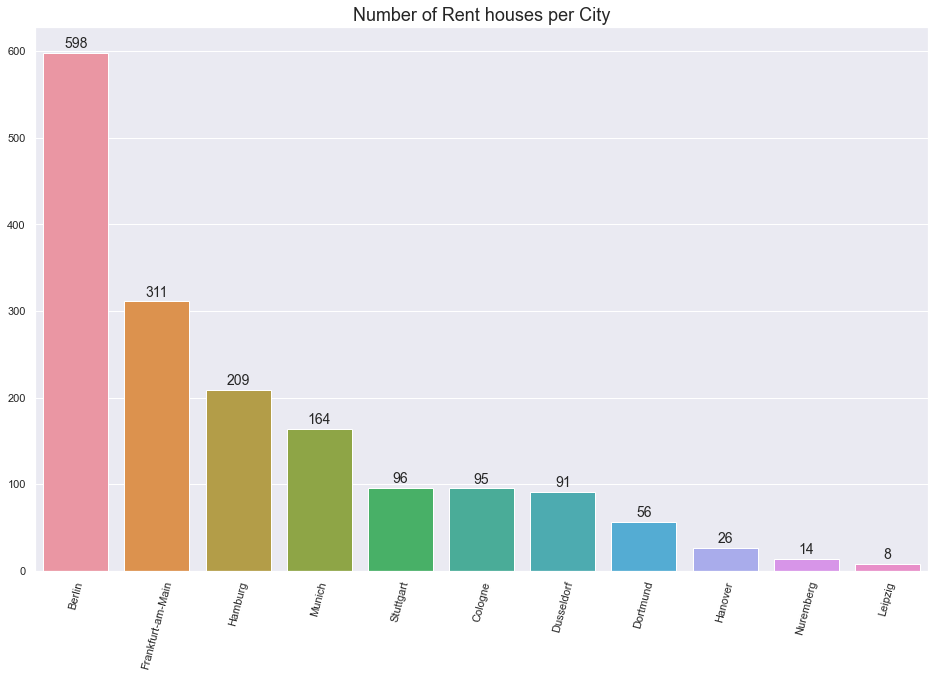

In [51]:
# count plot - number of rent houses offer per city.
ax = sns.barplot(df_houses['city'].value_counts().keys(), y = df_houses['city'].value_counts().values)
plt.title('Number of Rent houses per City', fontsize = 18)
plt.xticks(rotation=75)
annot_plot(ax)
ax.figure.savefig(r'../images/rent_houses_per_city.png')

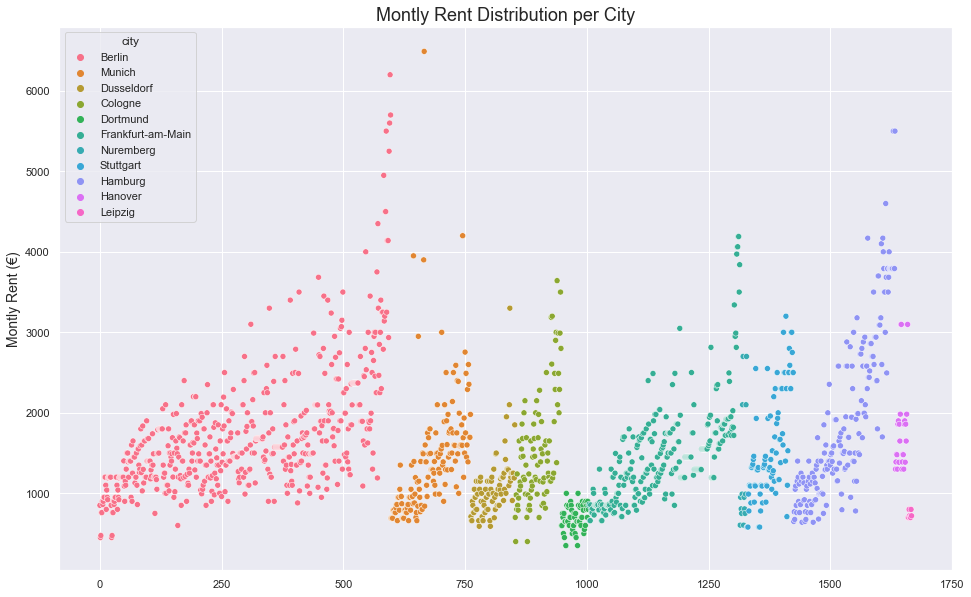

In [52]:
ax = sns.scatterplot(x = df_houses.index, y = 'montly_rent', hue = 'city', data = df_houses)
plt.title('Montly Rent Distribution per City', fontsize = 18)
plt.ylabel('Montly Rent (€)', fontsize = 14)
ax.figure.savefig(r'../images/montly_rent_per_city.png')

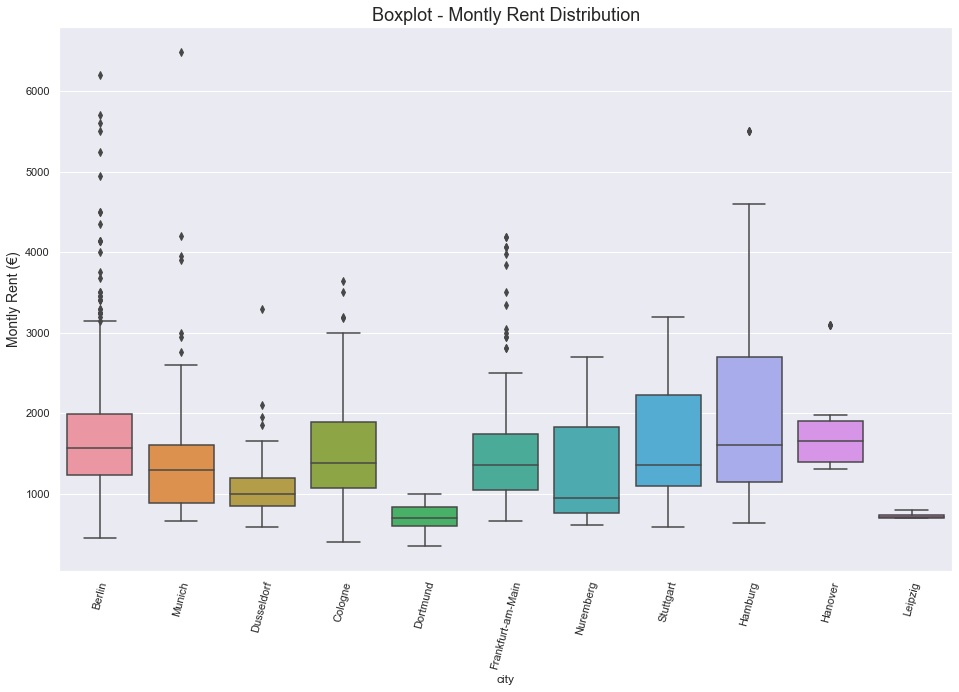

In [53]:
ax = sns.boxplot(x = 'city', y = 'montly_rent', data = df_houses)
plt.title('Boxplot - Montly Rent Distribution', fontsize = 18)
plt.ylabel('Montly Rent (€)', fontsize = 14)
plt.xticks(rotation=75);
ax.figure.savefig(r'../images/boxplot_rent_distrition_per_city.png')

#### Size

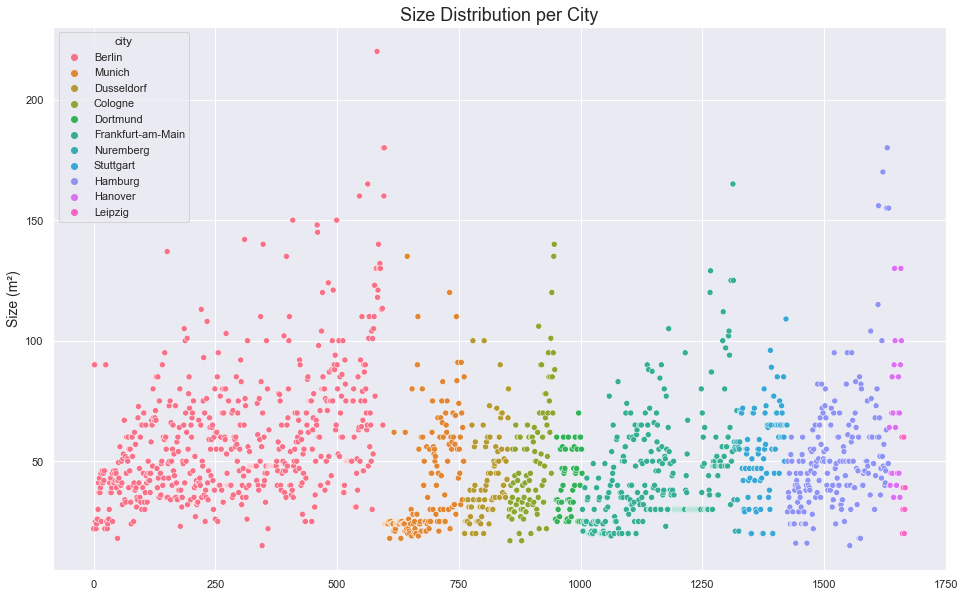

In [55]:
# Averagesize distribution per city
ax = sns.scatterplot(x = df_houses.index, y = 'size', hue = 'city', data = df_houses)
plt.title('Size Distribution per City', fontsize = 18)
plt.ylabel('Size (m²)', fontsize = 14)
ax.figure.savefig(r'../images/size_distribution_per_city.png')

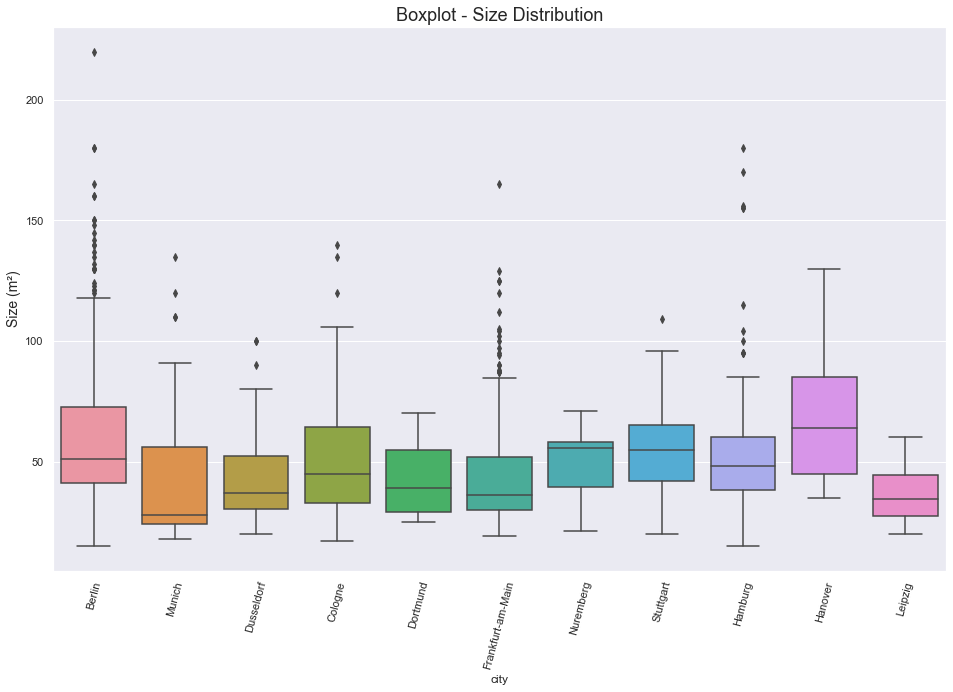

In [56]:
# Boxplot size distibution

ax = sns.boxplot(x = 'city', y = 'size', data = df_houses)
plt.title('Boxplot - Size Distribution', fontsize = 18)
plt.ylabel('Size (m²)', fontsize = 14)
plt.xticks(rotation=75);
ax.figure.savefig(r'../images/boxplot_size_distrition_per_city.png')

#### m² value

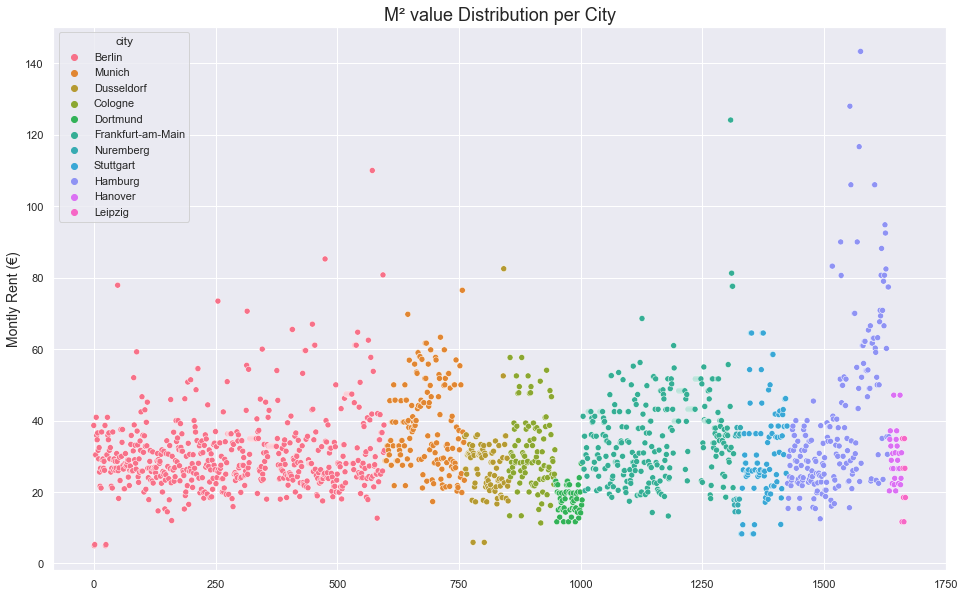

In [54]:
# Average m2 value dsitribution per city
ax = sns.scatterplot(x = df_houses.index, y = 'm2_value', hue = 'city', data = df_houses)
plt.title('M² value Distribution per City', fontsize = 18)
plt.ylabel('Montly Rent (€)', fontsize = 14)
ax.figure.savefig(r'../images/m2_distribution_per_city.png')

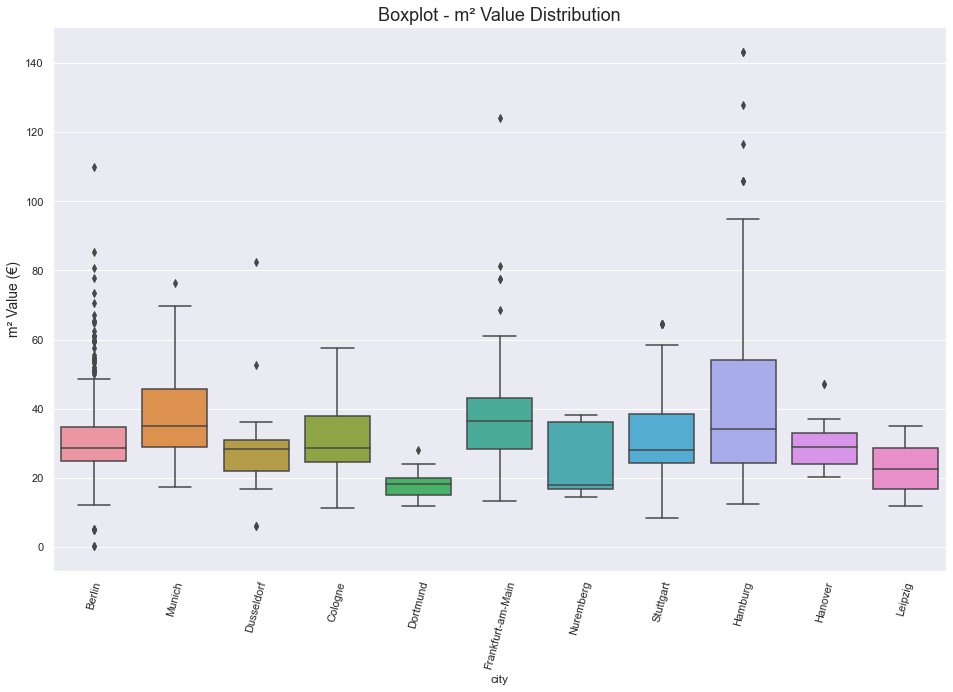

In [33]:
ax = sns.boxplot(x = 'city', y = 'm2_value', data = df_houses)
plt.title('Boxplot - m² Value Distribution', fontsize = 18)
plt.ylabel('m² Value (€)', fontsize = 14)
plt.xticks(rotation=75);
ax.figure.savefig(r'../images/boxplot_2_value_distrition_per_city.png')

#### Pets

In [59]:
df_houses['city'].value_counts().values

array([598, 311, 209, 164,  96,  95,  91,  56,  26,  14,   8], dtype=int64)

In [57]:
# count plot - permission for pets.
ax = sns.barplot(df_houses['pets'].value_counts().keys(), y = df_houses['pets'].value_counts().values)
plt.title('Permission for Pets', fontsize = 18)
plt.xticks(rotation=75)
annot_plot(ax)
ax.figure.savefig(r'../images/count_pets_permission.png')

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Grouper and axis must be same length

#### Size

In [35]:
df_houses.head()

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
0,1719697,2021-05-13 12:16:03,Berlin,Nürnberger Straße,22.0,Pets not allowed,850,1700,38.636364,52.50027,13.33596
1,1716752,2021-05-13 12:16:05,Berlin,Schnellerstraße,90.0,Pets not allowed,450,900,5.000000,52.45495,13.51636
2,1716755,2021-05-13 12:16:07,Berlin,Schnellerstraße,90.0,Pets not allowed,475,950,5.277778,52.45495,13.51636
3,1724139,2021-05-13 12:16:09,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863
4,1721869,2021-05-13 12:16:11,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863


In [36]:
grouped_cities = df_houses.groupby('city')['size', 'montly_rent', 'deposit_value', 'm2_value'].mean().reset_index()

<ipython-input-36-0193e5f47aa0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_cities = df_houses.groupby('city')['size', 'montly_rent', 'deposit_value', 'm2_value'].mean().reset_index()


In [37]:
grouped_cities

,city,size,montly_rent,deposit_value,m2_value
0,Berlin,72.903982,1733.248333,1912.448333,30.976192
1,Cologne,52.368421,1550.326316,2035.726316,31.569389
2,Dortmund,40.892857,701.000000,1019.142857,17.947117
3,Dusseldorf,42.416484,1068.604396,1067.802198,27.387048
4,Frankfurt-am-Main,43.248553,1464.932476,1939.575563,36.860512
5,Hamburg,51.662871,1993.263158,1141.296651,42.024130
6,Hanover,66.076923,1829.615385,1338.461538,29.549513
7,Leipzig,37.250000,729.500000,225.000000,22.927885
8,Munich,40.465854,1417.103659,1382.743902,38.034892
9,Nuremberg,50.385714,1271.428571,796.000000,25.223392


### 1.1.2 Bivariate Analysis